In [1]:
import numpy as np
import numpy.random as npr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pymc3 as pm
from ipywidgets import interact
import arviz as az


In [3]:
npr.seed(1)

npr.rand(1000)

array([[4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01,
        1.46755891e-01, 9.23385948e-02, 1.86260211e-01, 3.45560727e-01,
        3.96767474e-01, 5.38816734e-01]])

In [12]:
npr.randint(low=2,size=10)

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0])

(array([2.810e+02, 1.201e+03, 2.299e+03, 2.735e+03, 1.988e+03, 1.036e+03,
        3.550e+02, 8.800e+01, 1.600e+01, 1.000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

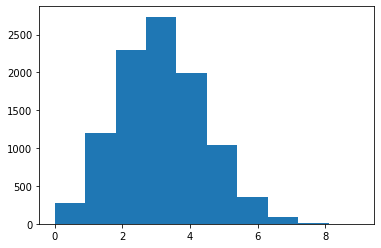

In [18]:
import matplotlib.pyplot as plt
plt.hist([  npr.binomial(10,0.3) for _ in range(10000)],bins=10)

In [44]:
aa=[  npr.binomial(10,0.3) for _ in range(1000)]

def ecdf(x):
  ''' Cummulative prob density graph'''

  n=len(x)
  x=sorted(x)

  y=np.arange(1,n+1)/n#Probability till this edlelemnt can be computed using linspace that keeps incrementing at steps till last element

  return x,y
x=aa
n=len(x)
x=sorted(x)

y=np.arange(1,n+1)/n
y=np.round(y,1)
all(y==np.round(np.linspace(0+(1/n),1,n),1))
# y
# np.linspace(0+(1/n),1,n)
# y==np.linspace(0+(1/n),1,n)

True

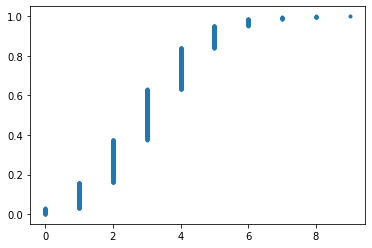

In [47]:
xx,yy=ecdf(aa)

plt.plot(xx,yy,'.')#In biased coin with u at 0.3 probability of attaining greater than equl to 4 in 10 trails is 1-0.6=0.4

In [56]:
N=150
p_a=0.15

n_success=np.sum(npr.binomial(N,p_a))

In [57]:
with pm.Model() as model_try:
  '''
  We will assume binomial likelihood for the observed data and the parameter we wish to evaluate
  The binomial is assumed to have 150 trials based distribution with unknown p
  We will try to evaluate distribution of p in order to generate some sense about our data distribution

  We know that our data comes from a 
  '''
  #define configuration of prior, use pm module and not np as pm inherits np and defines some more parameters
  pri=pm.Uniform("pri",lower=0,upper=1)

  #Define distribution and parameter for the likelihood,the prob parameter of the binomial distribution will get updated with every observed data
  #We defined an initial start for prob/p of binomial that is uniform distribution from 0 to 1, will have same value for all probabilities at the start
  likelihood=pm.Binomial(
      "likelihood",n=N,
      p=pri,observed=n_success
  )




In [59]:
with model_try:
  posterior=pm.sample(1000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [pri]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 3 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


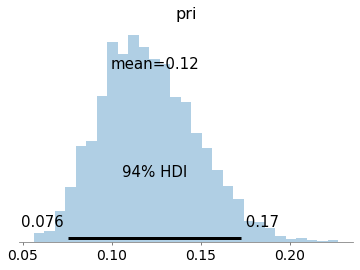

In [61]:

# Posterior plot for binomial model
az.plot_posterior(posterior, kind='hist');

## Posterior after 1000 iterations suggest that the data it has been receiving has been generated from a binomial model that has p value centered around 0.12 and has 94% confidence range between 0.075 and 0.175


https://github.com/ericmjl/bayesian-stats-modelling-tutorial/blob/master/notebooks/03-instructor-bayesian-estimation.ipynb

##### Thanks  ENthought 
##### U guys Rockk 
